# Supervised Learning
### Benign and malignant cancer

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

dataset = pd.read_csv("../data/Cancer_Data.csv")

if 'Unnamed: 32' in dataset.columns:
    dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 

plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap='Oranges')
print(dataset.corr())
plt.show()

dataset

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['diagnosis','id'],axis=1)
y = dataset['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



### Decision Tree

First, we will analyse the dataset with all information, and for that, we first need to create a decision tree.
Our first decision tree will be a default one, created by the scikit learn library.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier() 
clf.get_params()

Now, we send the decision tree our train sample.

In [ ]:
clf.fit(x_train,y_train)

To make the predictions we call the function:

In [ ]:
predictions = clf.predict(x_test)

#### Accuracy

In [ ]:

accuracy_score(y_test, predictions)

#### Precision

In [ ]:

precision_score(y_test, predictions)

With this code, we can see the importance given to each feature of the dataset by the decision tree.

In [ ]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

In our dataset, we have 3 type of data:
 - worst: worst value recorded from that person
 - se: standard error
 - mean: mean a list of values

To see if we can improve our accuracy and precision, we are going to try to separate these 3 types and we will run it with the same decision tree to see if our results improve.<br>
We will also use the same lines as x_train and x_test so we can compare our results.

#### Dataset only with "Worst" values

In [ ]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])


clf.fit(x_worst_train,y_train)
predictions_worst = clf.predict(x_worst_test)
accuracy_score(y_test, predictions_worst)

In [ ]:
precision_score(y_test, predictions_worst)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_worst)

In [ ]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_worst_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

#### Dataset only with "Mean" values

In [ ]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])


clf.fit(x_mean_train,y_train)
predictions_mean = clf.predict(x_mean_test)
accuracy_score(y_test, predictions_mean)

In [ ]:
precision_score(y_test, predictions_mean)

In [ ]:
feature_importance_mean = pd.DataFrame(clf.feature_importances_, index = x_mean_test.columns).sort_values(0, ascending=False)
feature_importance_mean.columns = ['%']
feature_importance_mean

#### Dataset only with "SE" values

In [ ]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])


clf.fit(x_se_train,y_train)
predictions_se = clf.predict(x_se_test)
accuracy_score(y_test, predictions_se)

In [ ]:
precision_score(y_test, predictions_se)

In [ ]:
feature_importance_se = pd.DataFrame(clf.feature_importances_, index = x_se_test.columns).sort_values(0, ascending=False)
feature_importance_se.columns = ['%']
feature_importance_se

#### Dataset without "SE" values

Since the SE values got the worst results, we will try to use the all the dataset but without the SE values to see if the predictions are better

In [ ]:
x_worstMean_train = x_train.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)
x_worstMean_test = x_test.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)

clf.fit(x_worstMean_train,y_train)
predictions_worstMean = clf.predict(x_worstMean_test)
accuracy_score(y_test, predictions_worstMean)

In [ ]:
precision_score(y_test, predictions_worstMean)

In [ ]:
feature_importance_worstMean = pd.DataFrame(clf.feature_importances_, index = x_worstMean_test.columns).sort_values(0, ascending=False)
feature_importance_worstMean.columns = ['%']
feature_importance_worstMean

We gathered 30 results from each dataset and calculated the mean of each one to see the differences.<br>
<br>

The average accuracy of each dataset was:
 - "Worst" Values: 0,93410
 - Without "SE" Values: 0,92577 
 - Normal Datase: 0,92027
 - "Mean" Values: 0,90863
 - "SE" Values: 0,87820

<br>

![Alt text](../images/decision_tree_accuracy.png)

<br>
In this graph we can see that the dataset with the "worst" columns has the best results in terms of accuracy but it's still very close to the dataset without the Standard Error (SE) columns and with the Normal dataset.
<br>


The same happened with the precision, being the dataset with the "Worst" values the best one.

 - "Worst" Values: 0,91085
 - Without "SE" Values: 0,90221
  - Normal Datase: 0,89370
 - "Mean" Values: 0,87820
 - "SE" Values: 0,76504

<br>

![Alt text](../images/decision_tree_precision.png)

<br>

The fact that the values are all very close might be explained by the fact that the Decision tree algorithm uses the greedy algorithm at each split finding a local optima, since "worst" values give the best results, all the datasets containing that values are going to be very similar. <br>
A way to improve decision trees is to avoid overfitting. This could be made by limiting maximum depth, pruning etc.
When we prune a tree we are correcting it after it has been fitted to the training dataset. It starts at the leaf nodes and removes those branches that do not affect the overall tree accuracy. It also lowers the complexity of the model.
<br>
In our code we can use sklearn to prune our trees using the ``ccp_alpha`` attribute inside the ``DecisionTreeClassifier`` function.


#### Dataset with "worst" values using pruning

To prune a tree using sklearn we have to set the attribute `ccp_alpha` inside the `DecisionTreeClassifier` function but this value varies with each tree.<br>
A way to calculate the best alpha value for each tree is to get the different applicable alpha values. Then we just run the same decision tree with the different alpha values to get the accuracy.<br>
The code below shows the relation between alpha and accuracy.

In [ ]:
path = clf.cost_complexity_pruning_path(x_worst_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf_worst = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_worst.fit(x_worst_train, y_train)
    clfs.append(clf_worst)

acc_scores = [accuracy_score(y_test, clf_worst.predict(x_worst_test)) for clf_worst in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [ ]:
from statistics import mean
accuracy_values = []

for i in range(100):
    x_alpha = x.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    x_alpha_train, x_alpha_test, y_alpha_train, y_alpha_test = train_test_split(x_alpha, y, test_size=0.3)
    
    clf_alpha = DecisionTreeClassifier() 

    path = clf_alpha.cost_complexity_pruning_path(x_alpha_train, y_alpha_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    clfs = []

    for ccp_alpha in ccp_alphas:
        clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_alpha.fit(x_alpha_train, y_alpha_train)
        clfs.append(clf_alpha)

    acc_scores = [accuracy_score(y_alpha_test, clf_alpha.predict(x_alpha_test)) for clf_alpha in clfs]
    accuracy_values.append(max(acc_scores))

mean(accuracy_values)

    


### Support Vector Machine

Suppot vector machines (SVM) attempt to find a hyperplane in an space of N dimensions, where N is the number of classification attributes. <br>This hyperplane is used to separate the data into two distinct classes, in our case, benign and malignant cancer.

We will use the same datasets as before, and start by an SVM classifier object and fit it to our training data. We then make a prediction using the test data and calculate the accuracy and precision, as well as the confusion matrix. (We also defined a function to plot the confusion matrix, which we will use later on).

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score

svm = SVC()
svm.fit(x_train, y_train)

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
y_pred = svm.predict(x_test)


svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

In [26]:
def show_plot(y_pred, accuracy, precision, recall, f1_score):

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap=plt.cm.Oranges)
    plt.title("Confusion Matrix\nAccuracy: {:.3f} - Precision: {:.3f} - Recall: {:.3f} - F1 Score: {:.3f}".format(accuracy, precision, recall, f1_score))
    plt.colorbar()
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.xticks([0, 1], ["Benign", "Malignant"])
    plt.yticks([0, 1], ["Benign", "Malignant"])

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

    plt.show()

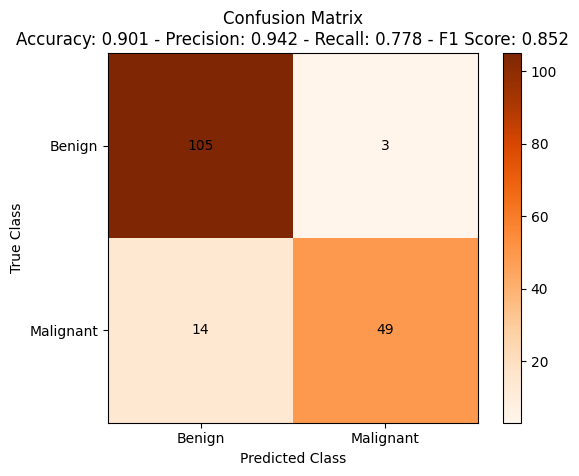

In [27]:
show_plot(y_pred, svm_accuracy, svm_precision, svm_recall, svm_f1)

As we can see in the confusion matrix, the SVM classifier shows promising results. However, we can try to improve it by removing attributes that could muddle the model. This would also reduce the number of dimensions we have to deal with, which simplifies the model.
<br> We'll do this by dividing the features into three groups: worst, mean and standard error. We'll then run the SVM classifier on each group and compare the results.

#### Dataset with only "Worst" features

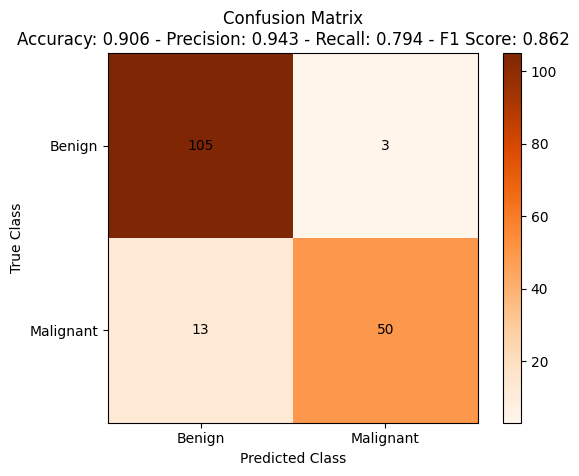

In [28]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

svm.fit(x_worst_train,y_train)
svm_predictions_worst = svm.predict(x_worst_test)

svm_accuracy_worst = accuracy_score(y_test, svm_predictions_worst)
svm_precision_worst = precision_score(y_test, svm_predictions_worst)
svm_recall_worst = recall_score(y_test, svm_predictions_worst)
svm_f1_worst = f1_score(y_test, svm_predictions_worst)

show_plot(svm_predictions_worst, svm_accuracy_worst, svm_precision_worst, svm_recall_worst, svm_f1_worst)

#### Dataset with only "Mean" features

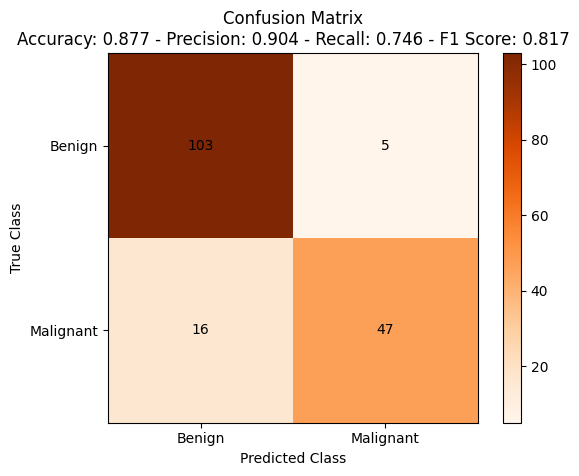

In [29]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])



svm.fit(x_mean_train,y_train)
svm_predictions_mean = svm.predict(x_mean_test)

svm_accuracy_mean = accuracy_score(y_test, svm_predictions_mean)
svm_precision_mean = precision_score(y_test, svm_predictions_mean)
svm_recall_mean = recall_score(y_test, svm_predictions_mean)
svm_f1_mean = f1_score(y_test, svm_predictions_mean)

show_plot(svm_predictions_mean, svm_accuracy_mean, svm_precision_mean, svm_recall_mean, svm_f1_mean)

#### Dataset with only "Standard Error" features

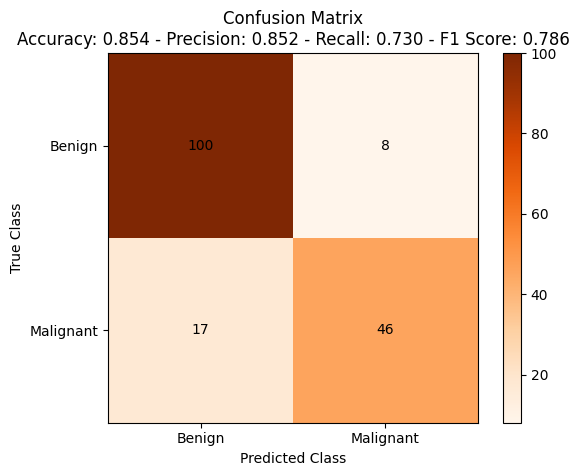

In [30]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])



svm.fit(x_se_train,y_train)
svm_predictions_se = svm.predict(x_se_test)

svm_accuracy_se = accuracy_score(y_test, svm_predictions_se)
svm_precision_se = precision_score(y_test, svm_predictions_se)
svm_recall_se = recall_score(y_test, svm_predictions_se)
svm_f1_se = f1_score(y_test, svm_predictions_se)

show_plot(svm_predictions_se, svm_accuracy_se, svm_precision_se, svm_recall_se, svm_f1_se)

From the previous tests we can conclude that, just like with the decision tree, the dataset with the worst features has the best results.
<br> We can also see that SVM gets better values all around compared to the decision tree, which is expected since SVM can handle outliers better than the decision tree by allowing some misclassification. 

We are getting good results but we can still try to improve our model. From now on we'll only use the dataset with the "Worst" features, and we'll try to improve the model by tuning the hyperparameters. We'll use the GridSearchCV function from sklearn to find the best hyperparameters for our model.

In [31]:
from sklearn.model_selection import GridSearchCV, KFold


param_grid = {
    'C': [0.1, 1, 4], #penalty parameter of error term -> increase can lead to over fitting
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4], #1 == linear, 
    'gamma': ['scale', 'auto'], #the higher the gamma, the more influence closer points have
    'shrinking': [True, False],
    'verbose': [2]
}

cv = KFold(n_splits=10)

grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=cv) # Perform grid search with cross-validation
grid_search.fit(x_worst_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_prediction = best_model.predict(x_worst_test)

best_accuracy = accuracy_score(y_test, best_prediction)
best_precision = precision_score(y_test, best_prediction)
best_recall = recall_score(y_test, best_prediction)
best_f1 = f1_score(y_test, best_prediction)

show_plot(best_prediction, best_accuracy, best_precision, best_recall, best_f1)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]